In [1]:
import os
print(os.getcwd())
print(os.listdir())


C:\Users\pavis\PCB project
['.ipynb_checkpoints', 'data', 'PCB Module1.ipynb']


In [2]:
import cv2

template = cv2.imread("./data/template/template.jpg")
test = cv2.imread("./data/test/test.jpg")

print(template is None)
print(test is None)


True
True


In [3]:
import cv2

template = cv2.imread("./data/template/template.jpg")
test = cv2.imread("./data/test/test.jpg")

print(template is None)
print(test is None)


False
False


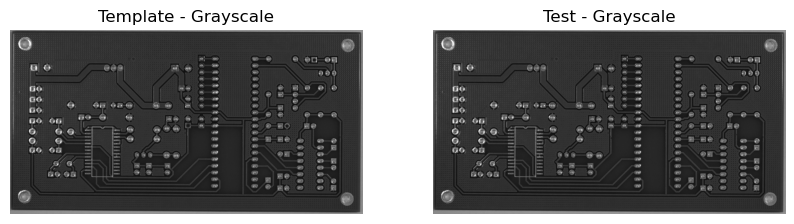

In [4]:
import cv2
import matplotlib.pyplot as plt

# Convert to grayscale
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

# Show images
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Template - Grayscale")
plt.imshow(template_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Test - Grayscale")
plt.imshow(test_gray, cmap='gray')
plt.axis('off')

plt.show()


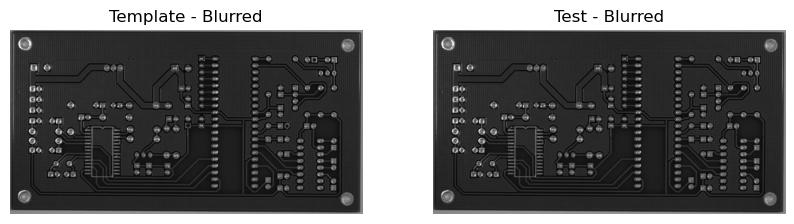

In [5]:
# Apply Gaussian Blur
template_blur = cv2.GaussianBlur(template_gray, (5, 5), 0)
test_blur = cv2.GaussianBlur(test_gray, (5, 5), 0)

# Display blurred images
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Template - Blurred")
plt.imshow(template_blur, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Test - Blurred")
plt.imshow(test_blur, cmap='gray')
plt.axis('off')

plt.show()


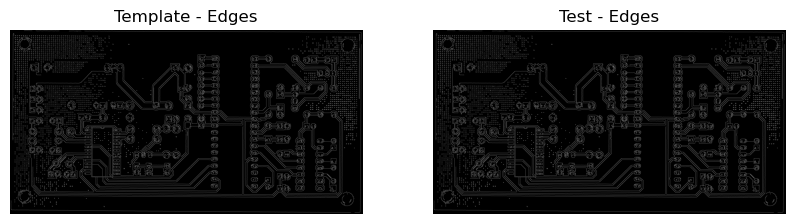

In [6]:
# Edge detection
template_edges = cv2.Canny(template_blur, 50, 150)
test_edges = cv2.Canny(test_blur, 50, 150)

# Display edges
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Template - Edges")
plt.imshow(template_edges, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Test - Edges")
plt.imshow(test_edges, cmap='gray')
plt.axis('off')

plt.show()


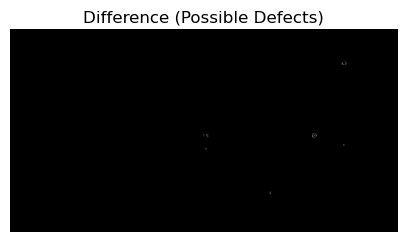

In [7]:
# Absolute difference between template and test edges
diff = cv2.absdiff(template_edges, test_edges)

# Display difference image
plt.figure(figsize=(5,4))
plt.title("Difference (Possible Defects)")
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()


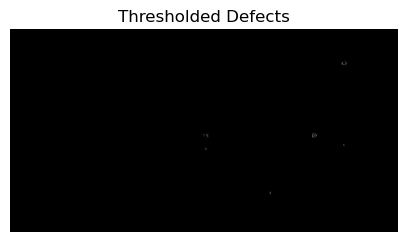

In [8]:
# Apply threshold to highlight defects
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Display thresholded image
plt.figure(figsize=(5,4))
plt.title("Thresholded Defects")
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()


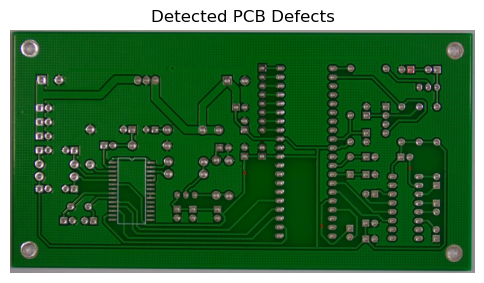

In [15]:
# Find contours (defect regions)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy original test image for drawing
result = test.copy()

# Draw bounding boxes on defects
for cnt in contours:
    if cv2.contourArea(cnt) > 20:   # ignore very tiny noise
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Display final defect detection result
plt.figure(figsize=(6,4))
plt.title("Detected PCB Defects")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


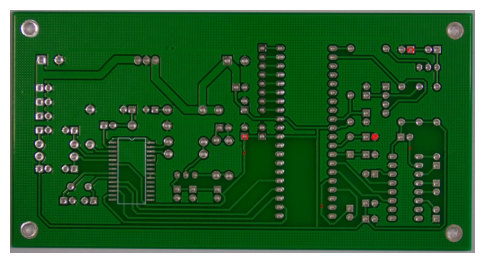

In [16]:
debug = test.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(debug, (x, y), (x+w, y+h), (0, 0, 255), 2)

plt.figure(figsize=(6,4))
plt.imshow(cv2.cvtColor(debug, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [19]:
ref_img = cv2.imread("data/template/good_pcb.jpg")
test_img = cv2.imread("data/test/test.jpg")

print(ref_img is None)
print(test_img is None)


True
False


In [20]:
import os
os.getcwd()


'C:\\Users\\pavis\\PCB project'

In [21]:
ref_img = cv2.imread("data/template/good_pcb.jpg")
test_img = cv2.imread("data/test/test.jpg")

print(ref_img is None)
print(test_img is None)


True
False


In [22]:
ref_img = cv2.imread("data/template/template.jpg")
test_img = cv2.imread("data/test/test.jpg")

print(ref_img is None)
print(test_img is None)


False
False


In [23]:
ref_gray = cv2.cvtColor(ref_img, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

print("Grayscale conversion done")


Grayscale conversion done


In [24]:
h, w = ref_gray.shape
test_gray_resized = cv2.resize(test_gray, (w, h))

print("Resize done")


Resize done


In [25]:
# Create ORB detector
orb = cv2.ORB_create(5000)

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(ref_gray, None)
kp2, des2 = orb.detectAndCompute(test_gray_resized, None)

print("Keypoints detected:")
print("Reference:", len(kp1))
print("Test:", len(kp2))


Keypoints detected:
Reference: 5000
Test: 5000


In [26]:
# Create BFMatcher (Brute Force Matcher)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance (best first)
matches = sorted(matches, key=lambda x: x.distance)

print("Total matches found:", len(matches))


Total matches found: 4926


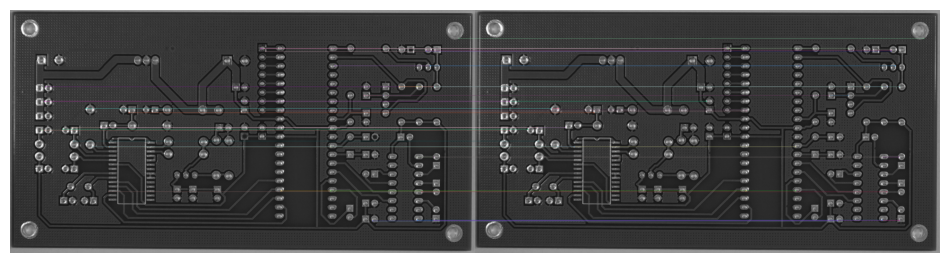

In [27]:
matched_img = cv2.drawMatches(
    ref_gray, kp1,
    test_gray_resized, kp2,
    matches[:50], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12,6))
plt.imshow(matched_img, cmap='gray')
plt.axis('off')
plt.show()


In [28]:
# Take top good matches
good_matches = matches[:50]


In [29]:
src_pts = []
dst_pts = []

for m in good_matches:
    src_pts.append(kp2[m.trainIdx].pt)   # test image points
    dst_pts.append(kp1[m.queryIdx].pt)   # reference image points

src_pts = np.float32(src_pts).reshape(-1, 1, 2)
dst_pts = np.float32(dst_pts).reshape(-1, 1, 2)


NameError: name 'np' is not defined

In [30]:
import numpy as np


In [31]:
src_pts = []
dst_pts = []

for m in good_matches:
    src_pts.append(kp2[m.trainIdx].pt)   # test image points
    dst_pts.append(kp1[m.queryIdx].pt)   # reference image points

src_pts = np.float32(src_pts).reshape(-1, 1, 2)
dst_pts = np.float32(dst_pts).reshape(-1, 1, 2)


In [32]:
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print("Homography matrix calculated")


Homography matrix calculated


In [33]:
h, w = ref_gray.shape
aligned_test = cv2.warpPerspective(test_gray_resized, H, (w, h))

print("Test image aligned")


Test image aligned


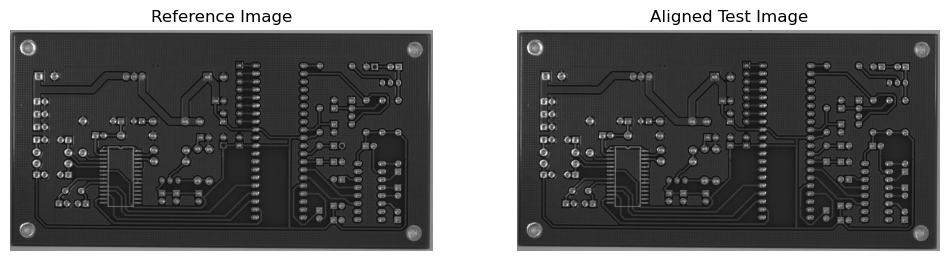

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Reference Image")
plt.imshow(ref_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Aligned Test Image")
plt.imshow(aligned_test, cmap='gray')
plt.axis('off')

plt.show()


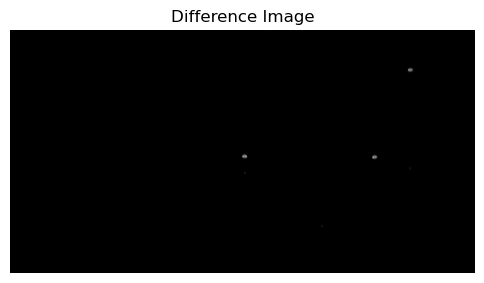

In [36]:
# Image subtraction
diff = cv2.absdiff(ref_gray, aligned_test)

plt.figure(figsize=(6,4))
plt.title("Difference Image")
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()


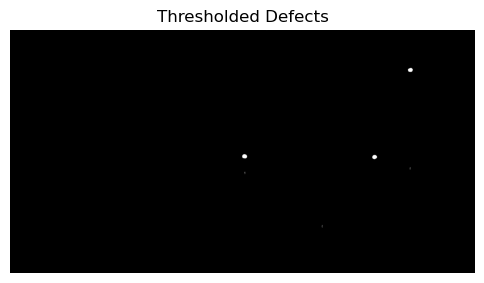

In [37]:
# Thresholding
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6,4))
plt.title("Thresholded Defects")
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()


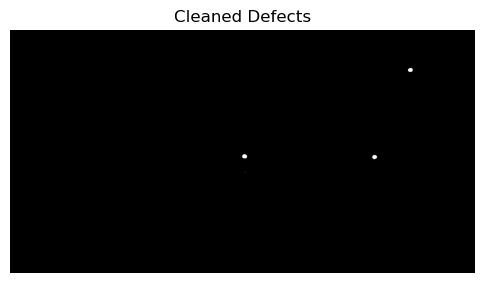

In [38]:
kernel = np.ones((3,3), np.uint8)
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(6,4))
plt.title("Cleaned Defects")
plt.imshow(clean, cmap='gray')
plt.axis('off')
plt.show()


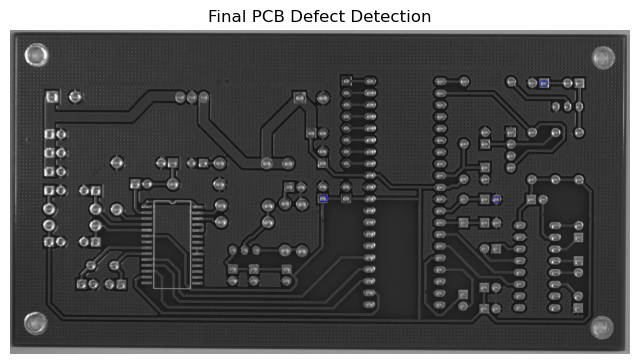

In [39]:
# Convert aligned test image to color (for drawing boxes)
aligned_color = cv2.cvtColor(aligned_test, cv2.COLOR_GRAY2BGR)

# Find contours
contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Filter very small noise
    if w > 5 and h > 5:
        cv2.rectangle(aligned_color, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show final defect detection
plt.figure(figsize=(8,5))
plt.title("Final PCB Defect Detection")
plt.imshow(aligned_color)
plt.axis('off')
plt.show()


In [41]:
print("Number of detected defects:", len(contours))


Number of detected defects: 5


In [43]:
cv2.imwrite("final_pcb_defects.jpg", aligned_color)
print("Image saved successfully")


Image saved successfully
